#**LAB Assignment - 3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
ratings = pd.read_csv('/content/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
users = pd.read_csv('/content/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
movies = pd.read_csv('/content/u.item', sep='|', encoding='latin-1',
                     names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                            'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
                            'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

## **1. Average Rating for Each Movie Genre**

In [3]:
# Merge ratings with movies on movie_id
ratings_movies = pd.merge(ratings, movies, on='movie_id')

# Calculate the average rating for each genre
genre_columns = movies.columns[6:]  # All genre columns start from the 6th column
genre_avg_rating = {}

for genre in genre_columns:
    genre_avg_rating[genre] = ratings_movies[ratings_movies[genre] == 1]['rating'].mean()

# Convert to a DataFrame for better readability
genre_avg_rating_df = pd.DataFrame(list(genre_avg_rating.items()), columns=['Genre', 'Average Rating'])
genre_avg_rating_df.sort_values(by='Average Rating', ascending=False)

,Genre,Average Rating
9,Film-Noir,3.921523
16,War,3.815812
7,Drama,3.687379
6,Documentary,3.672823
12,Mystery,3.638132
5,Crime,3.632278
13,Romance,3.621705
17,Western,3.613269
2,Animation,3.576699
14,Sci-Fi,3.560723


<ipython-input-4-3a46408d0ebe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating', y='Genre', data=genre_avg_rating_df.sort_values(by='Average Rating', ascending=False), palette='viridis')


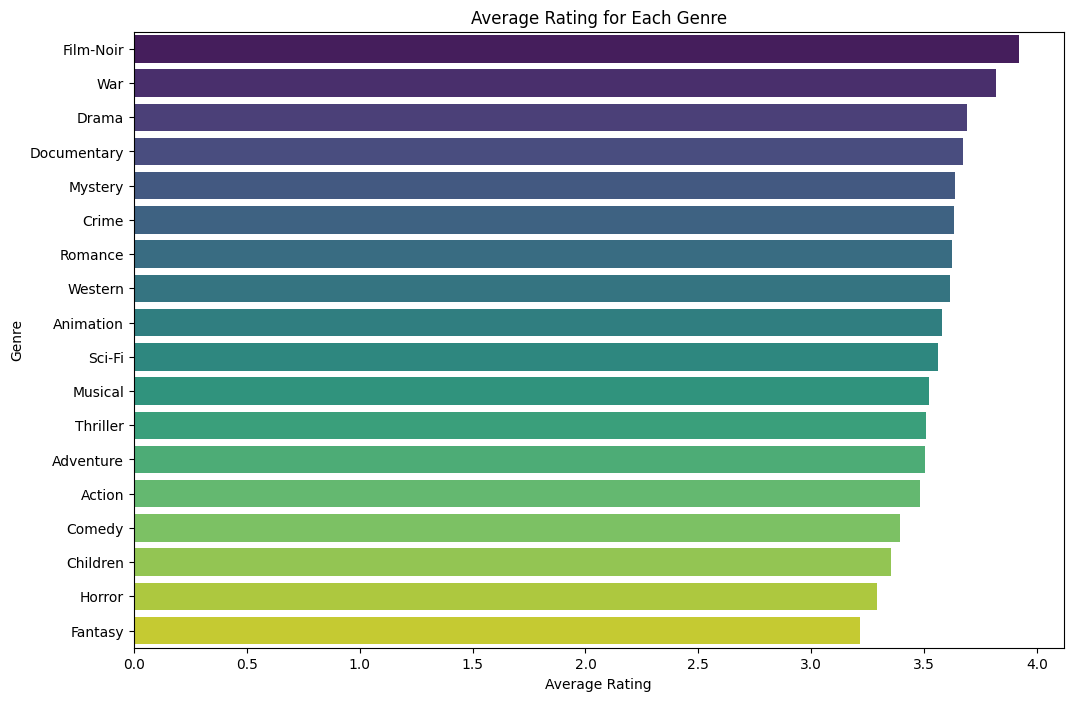

In [4]:
# Plotting the average rating for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Rating', y='Genre', data=genre_avg_rating_df.sort_values(by='Average Rating', ascending=False), palette='viridis')
plt.title('Average Rating for Each Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

## **2. Most Popular Genres Based on the Number of Ratings**

In [5]:
# Count the number of ratings for each genre
genre_popularity = {}

for genre in genre_columns:
    genre_popularity[genre] = ratings_movies[ratings_movies[genre] == 1].shape[0]

# Convert to a DataFrame for better readability
genre_popularity_df = pd.DataFrame(list(genre_popularity.items()), columns=['Genre', 'Number of Ratings'])
genre_popularity_df.sort_values(by='Number of Ratings', ascending=False)

,Genre,Number of Ratings
7,Drama,39895
4,Comedy,29832
0,Action,25589
15,Thriller,21872
13,Romance,19461
1,Adventure,13753
14,Sci-Fi,12730
16,War,9398
5,Crime,8055
3,Children,7182


<ipython-input-6-e645e420542e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Ratings', y='Genre', data=genre_popularity_df.sort_values(by='Number of Ratings', ascending=False), palette='magma')


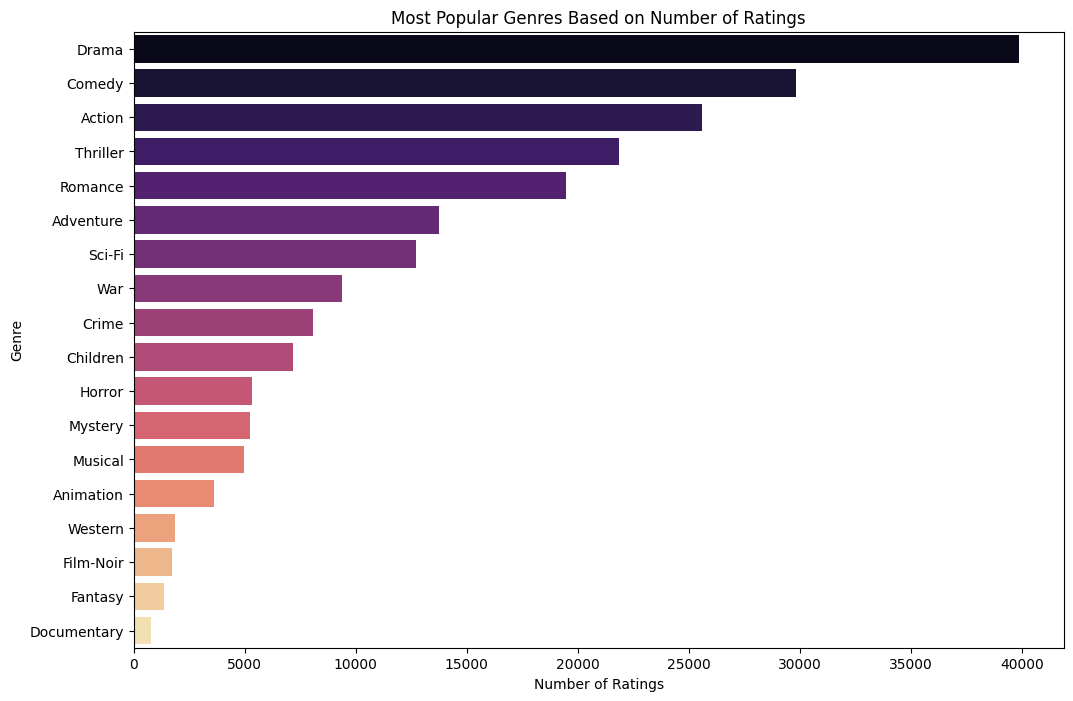

In [6]:
# Plotting the number of ratings for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Ratings', y='Genre', data=genre_popularity_df.sort_values(by='Number of Ratings', ascending=False), palette='magma')
plt.title('Most Popular Genres Based on Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.show()

##**3. Top-10 Movies with the Highest Number of Ratings**

In [7]:
# Count the number of ratings per movie
movie_rating_counts = ratings.groupby('movie_id').size().reset_index(name='rating_count')

# Merge with the movies DataFrame to get movie titles
top_10_movies = pd.merge(movie_rating_counts, movies[['movie_id', 'title']], on='movie_id')

# Sort by rating count and select the top 10
top_10_movies = top_10_movies.sort_values(by='rating_count', ascending=False).head(10)
top_10_movies[['title', 'rating_count']]

,title,rating_count
49,Star Wars (1977),583
257,Contact (1997),509
99,Fargo (1996),508
180,Return of the Jedi (1983),507
293,Liar Liar (1997),485
285,"English Patient, The (1996)",481
287,Scream (1996),478
0,Toy Story (1995),452
299,Air Force One (1997),431
120,Independence Day (ID4) (1996),429


<ipython-input-8-db978c86bba5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=top_10_movies.sort_values(by='rating_count', ascending=False), palette='coolwarm')


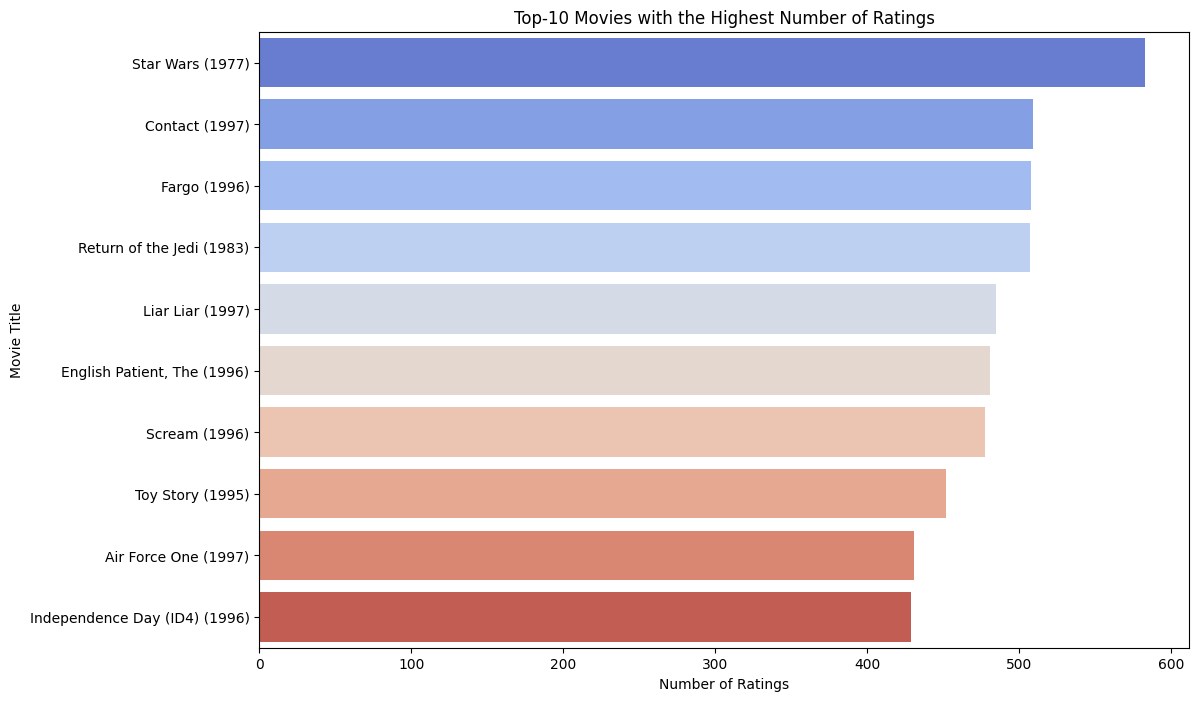

In [8]:
# Plotting the top-10 movies with the highest number of ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='title', data=top_10_movies.sort_values(by='rating_count', ascending=False), palette='coolwarm')
plt.title('Top-10 Movies with the Highest Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

##**4. Differences in Genre Preferences Between Male and Female Users**

In [9]:
# Merge ratings with users to get gender information
ratings_users = pd.merge(ratings_movies, users[['user_id', 'gender']], on='user_id')

# Calculate average rating for each genre by gender
genre_gender_rating = ratings_users.groupby('gender')[genre_columns].mean().T
genre_gender_rating.columns = ['Female', 'Male']
genre_gender_rating

,Female,Male
Action,0.211422,0.271304
Adventure,0.122028,0.142903
Animation,0.038656,0.035147
Children,0.086713,0.066658
Comedy,0.313442,0.293078
Crime,0.069697,0.084312
Documentary,0.007265,0.007689
Drama,0.427661,0.388998
Fantasy,0.014103,0.013318
Film-Noir,0.014957,0.018152


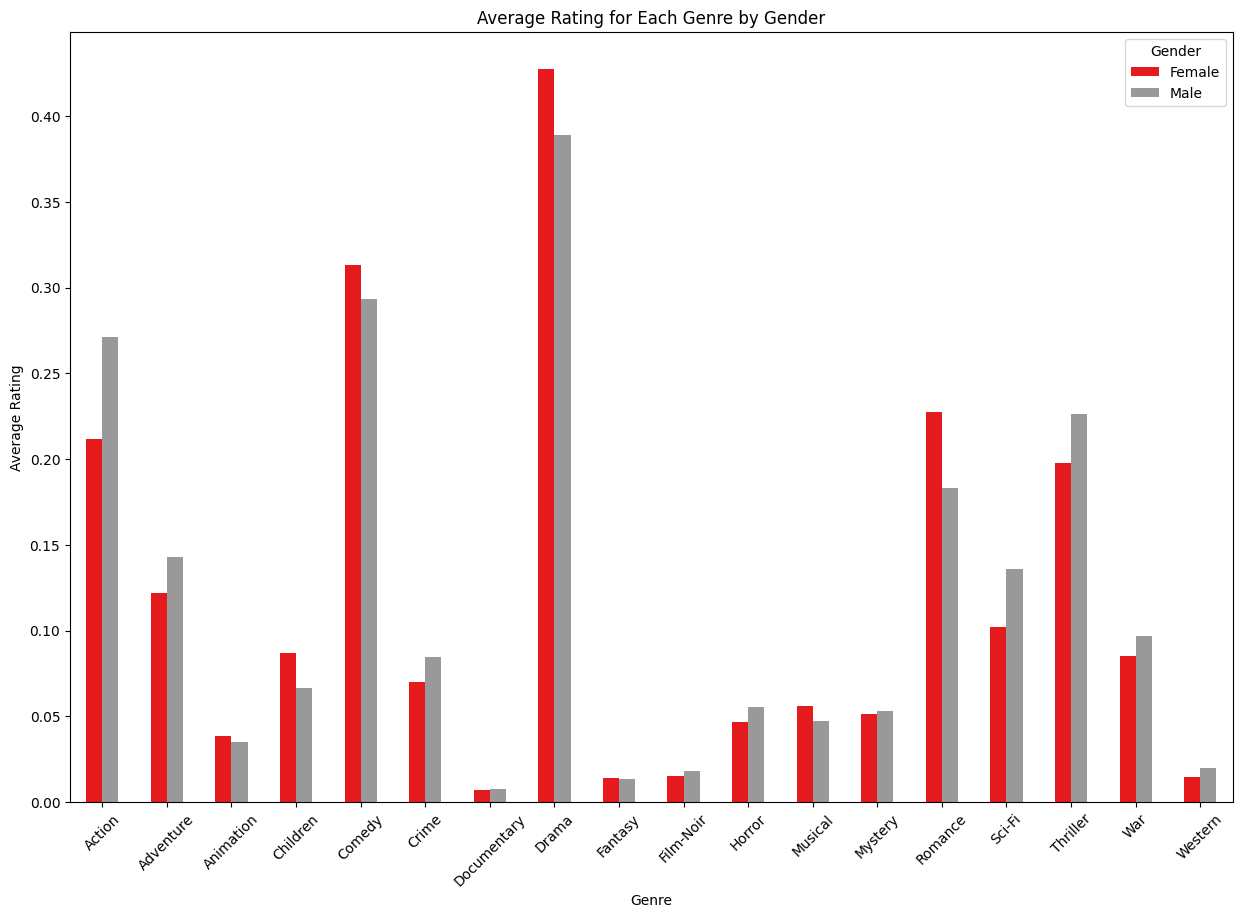

In [10]:
# Plotting the average rating for each genre by gender
genre_gender_rating.plot(kind='bar', figsize=(15, 10), colormap='Set1')
plt.title('Average Rating for Each Genre by Gender')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

##**5. Do Male or Female Users Rate More Movies on Average?**

In [11]:
# Count the number of ratings per user
user_rating_counts = ratings.groupby('user_id').size().reset_index(name='rating_count')

# Merge with users DataFrame to get gender information
user_rating_counts_gender = pd.merge(user_rating_counts, users[['user_id', 'gender']], on='user_id')

# Calculate average number of ratings by gender
avg_ratings_by_gender = user_rating_counts_gender.groupby('gender')['rating_count'].mean()
avg_ratings_by_gender

,rating_count
gender,
F,94.285714
M,110.835821


<ipython-input-12-da4b5113f4c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings_by_gender.index, y=avg_ratings_by_gender.values, palette='pastel')


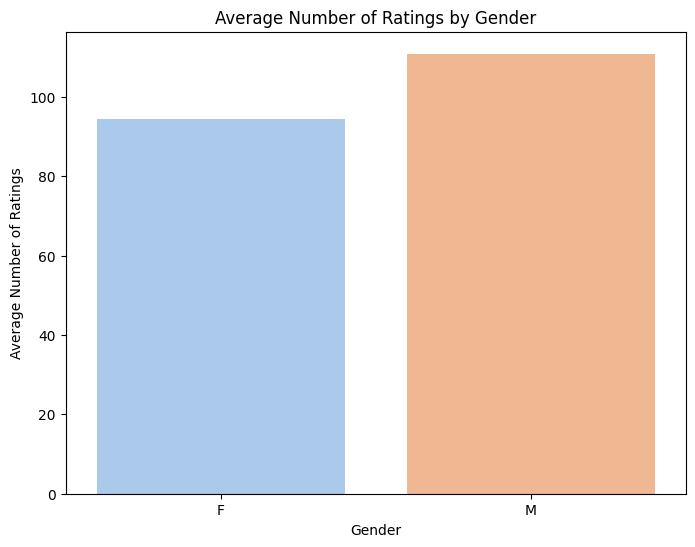

In [12]:
# Plotting the average number of ratings by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_ratings_by_gender.index, y=avg_ratings_by_gender.values, palette='pastel')
plt.title('Average Number of Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Ratings')
plt.show()

##**6. Top-Rated Movies Within Each Genre**

In [13]:
# Calculate the average rating for each movie
movie_avg_rating = ratings.groupby('movie_id')['rating'].mean().reset_index(name='average_rating')

# Merge with movies to get genre information
movie_avg_rating_genres = pd.merge(movie_avg_rating, movies, on='movie_id')

# Find the top-rated movie for each genre
top_movies_by_genre = {}

for genre in genre_columns:
    top_movie = movie_avg_rating_genres[movie_avg_rating_genres[genre] == 1].sort_values(by='average_rating', ascending=False).head(1)
    top_movies_by_genre[genre] = top_movie[['title', 'average_rating']]

# Convert to a DataFrame
top_movies_by_genre_df = pd.concat(top_movies_by_genre).reset_index(drop=True)
top_movies_by_genre_df

,title,average_rating
0,Star Wars (1977),4.358491
1,Star Kid (1997),5.000000
2,"Close Shave, A (1995)",4.491071
3,Star Kid (1997),5.000000
4,Santa with Muscles (1996),5.000000
5,They Made Me a Criminal (1939),5.000000
6,"Great Day in Harlem, A (1994)",5.000000
7,They Made Me a Criminal (1939),5.000000
8,Star Kid (1997),5.000000
9,"Manchurian Candidate, The (1962)",4.259542


<ipython-input-14-722cdc6b58d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='title', data=top_movies_by_genre_df, palette='Spectral')


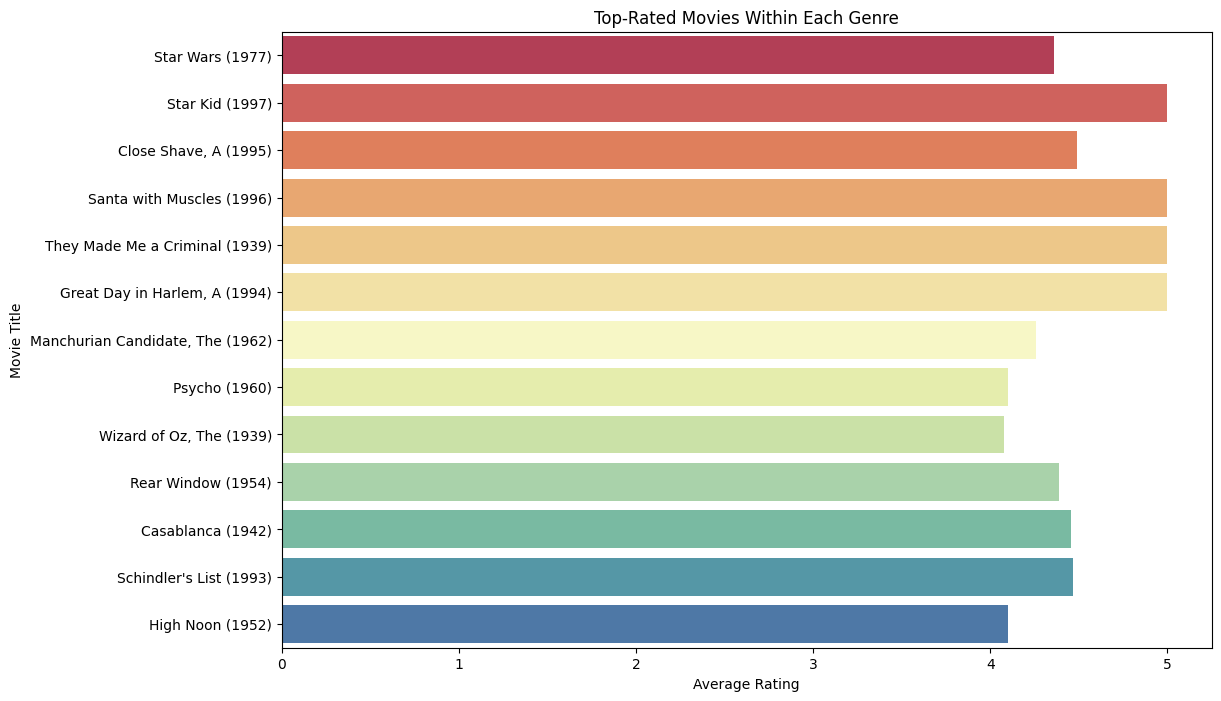

In [14]:
# Plotting the highest average rating for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='title', data=top_movies_by_genre_df, palette='Spectral')
plt.title('Top-Rated Movies Within Each Genre')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

##**7. How Ratings Vary Across Different User Age Groups**

In [15]:
# Define age bins
age_bins = [0, 18, 25, 35, 45, 50, 56, 100]
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

# Add age group to users DataFrame
users['age_group'] = pd.cut(users['age'], bins=age_bins, labels=age_labels, right=False)

# Merge with ratings
ratings_age = pd.merge(ratings, users[['user_id', 'age_group']], on='user_id')

# Calculate average rating per age group
avg_rating_by_age_group = ratings_age.groupby('age_group')['rating'].mean()
avg_rating_by_age_group

<ipython-input-15-1495e6950890>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_age_group = ratings_age.groupby('age_group')['rating'].mean()


,rating
age_group,
Under 18,3.423525
18-24,3.473525
25-34,3.488376
35-44,3.588485
45-49,3.629173
50-55,3.629324
56+,3.651703


<ipython-input-16-c29f07c1e866>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_age_group.index, y=avg_rating_by_age_group.values, palette='Blues')


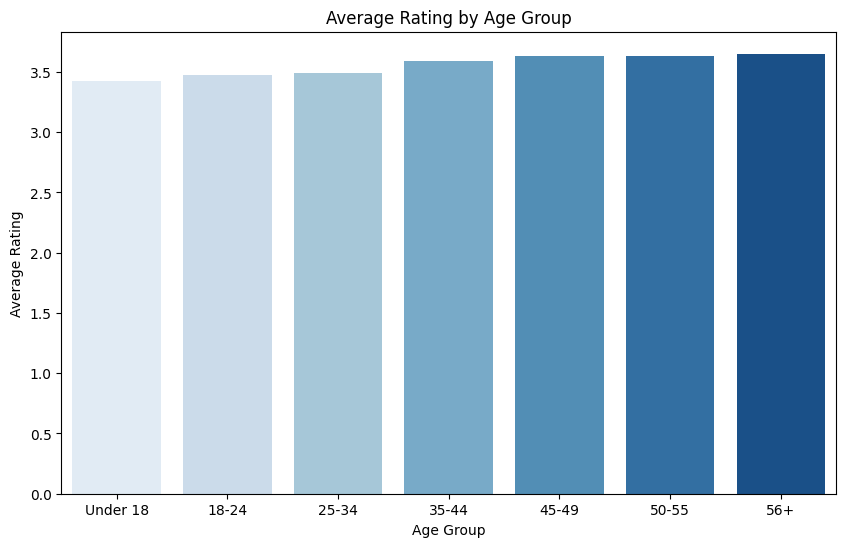

In [16]:
# Plotting the average rating by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_age_group.index, y=avg_rating_by_age_group.values, palette='Blues')
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()

##**8. How Ratings Vary Across Different User Occupationst**

In [17]:
# Merge ratings with users to get occupation information
ratings_occupation = pd.merge(ratings, users[['user_id', 'occupation']], on='user_id')

# Calculate average rating per occupation
avg_rating_by_occupation = ratings_occupation.groupby('occupation')['rating'].mean()
avg_rating_by_occupation

,rating
occupation,
administrator,3.635646
artist,3.653380
doctor,3.688889
educator,3.670621
engineer,3.541407
entertainment,3.441050
executive,3.349104
healthcare,2.896220
homemaker,3.301003


<ipython-input-18-aa5742186bbf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_occupation.values, y=avg_rating_by_occupation.index, palette='Purples')


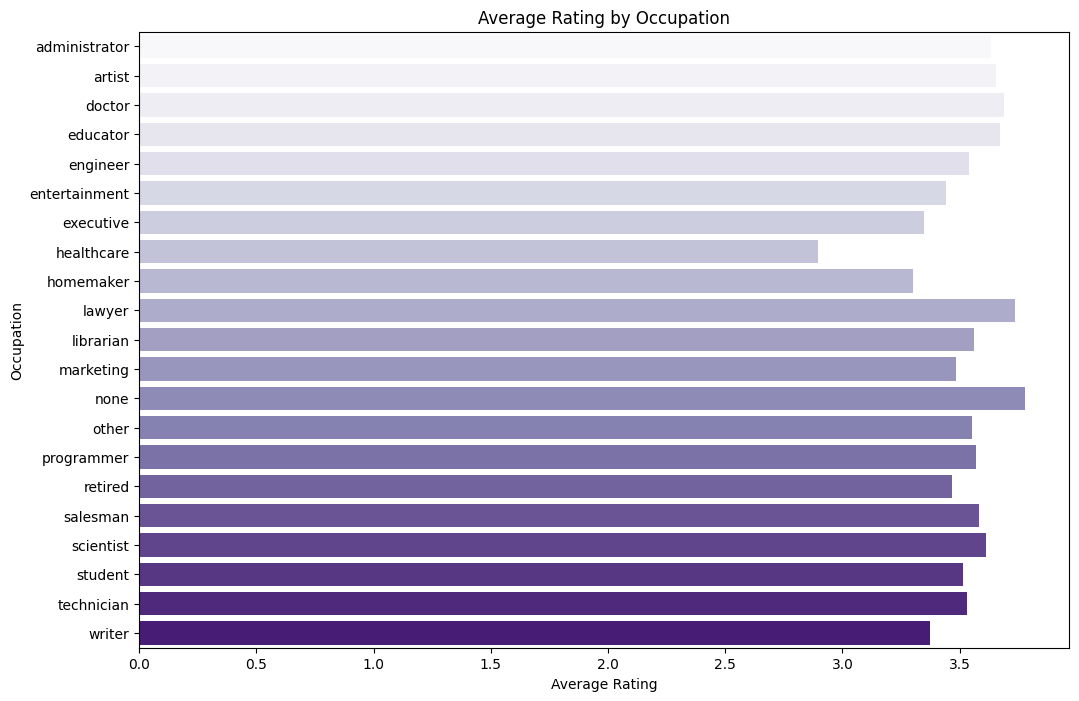

In [18]:
# Plotting the average rating by occupation
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_occupation.values, y=avg_rating_by_occupation.index, palette='Purples')
plt.title('Average Rating by Occupation')
plt.xlabel('Average Rating')
plt.ylabel('Occupation')
plt.show()

##**9. Which Genres Are Preferred by Different Age Groups**

In [19]:
# Merge ratings with age groups and genres
ratings_age_genres = pd.merge(ratings_age, movies[['movie_id'] + list(genre_columns)], on='movie_id')

# Count the number of ratings for each genre by age group
genre_preference_by_age = ratings_age_genres.groupby('age_group')[genre_columns].sum()

# Convert to a DataFrame for better readability
genre_preference_by_age_df = genre_preference_by_age.T
genre_preference_by_age_df

<ipython-input-19-44833d79cf80>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_preference_by_age = ratings_age_genres.groupby('age_group')[genre_columns].sum()


age_group,Under 18,18-24,25-34,35-44,45-49,50-55,56+
Action,733,6856,9423,4683,1591,1417,886
Adventure,380,3456,5094,2761,847,713,502
Animation,113,931,1408,746,180,133,94
Children,267,1769,2551,1621,400,304,270
Comedy,784,7361,10880,5792,1951,1679,1385
Crime,207,2143,2772,1433,537,558,405
Documentary,13,162,244,145,73,67,54
Drama,831,8748,13677,8025,3072,3155,2387
Fantasy,39,345,481,288,80,67,52
Film-Noir,34,314,542,395,148,164,136


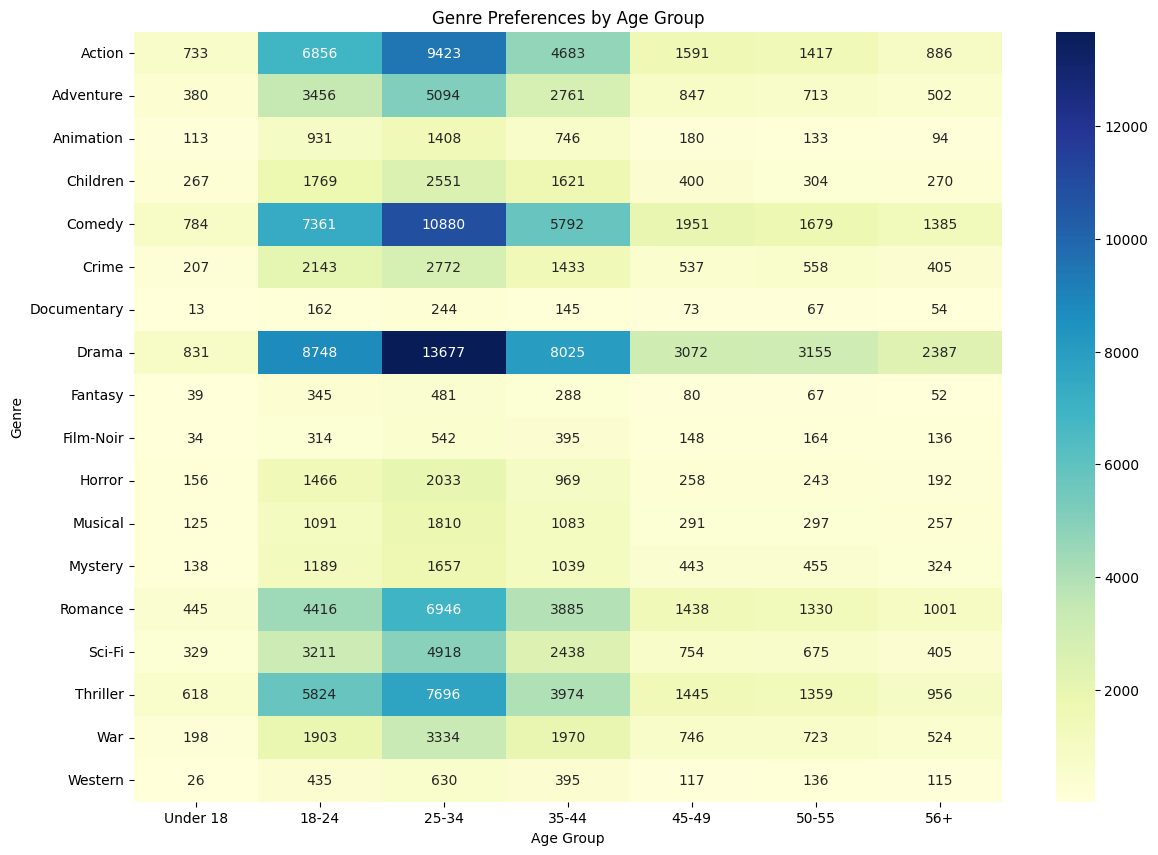

In [20]:
# Plotting the genre preferences by age group
plt.figure(figsize=(14, 10))
sns.heatmap(genre_preference_by_age_df, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Genre Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Genre')
plt.show()

##**10. How User Preferences Evolve Over Time**

In [21]:
# Convert timestamp to datetime
ratings_movies['timestamp'] = pd.to_datetime(ratings_movies['timestamp'], unit='s')

# Extract year from the timestamp
ratings_movies['year'] = ratings_movies['timestamp'].dt.year

# Calculate the number of ratings for each genre per year
genre_popularity_over_time = ratings_movies.groupby('year')[genre_columns].sum()

<Figure size 1400x1000 with 0 Axes>

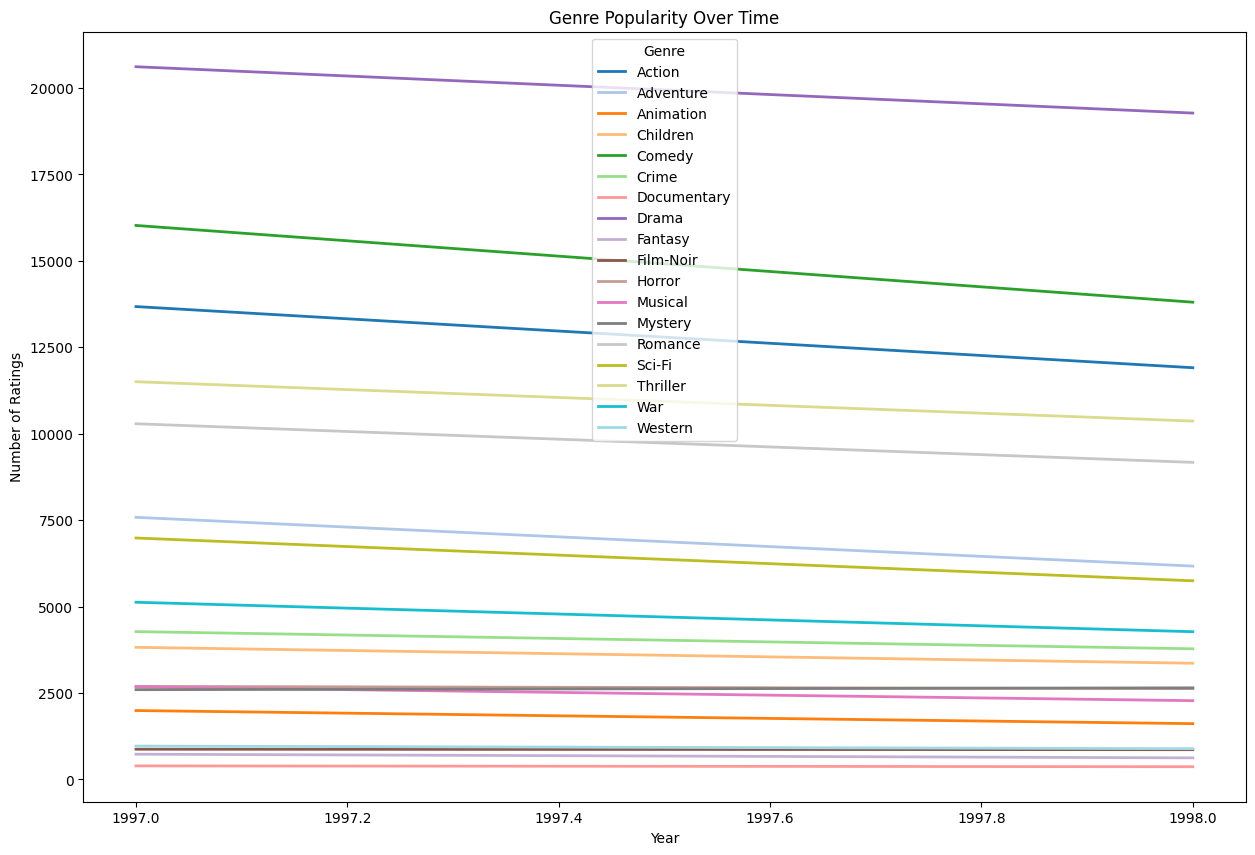

In [27]:
# Plotting genre popularity over time
plt.figure(figsize=(14, 10))
genre_popularity_over_time.plot(figsize=(15, 10), colormap='tab20', linewidth=2)
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.legend(title='Genre')
plt.show()